# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_percentage_error

In [415]:
# Load the data
data = pd.read_csv('/Users/arfatshaikh/Documents/Machine-Learning/Linear Regression/dataset/train.csv')

In [416]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [417]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [418]:
data.shape

(1460, 81)

In [419]:
all_data_na = (data.isnull().sum() / len(data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945
GarageQual,5.547945


# Handling Missing Values

In [420]:
data['PoolQC'] = data['PoolQC'].fillna('NA')

In [421]:
data['MiscFeature'] = data['MiscFeature'].fillna('NA')

In [422]:
data['Alley'] = data['Alley'].fillna('NA')

In [423]:
data['Fence'] = data['Fence'].fillna('NA')

In [424]:
data['FireplaceQu'] = data['FireplaceQu'].fillna('NA')

In [425]:
data['GarageType'] = data['GarageType'].fillna('NA')

In [426]:
data['GarageYrBlt'].head()

0    2003.0
1    1976.0
2    2001.0
3    1998.0
4    2000.0
Name: GarageYrBlt, dtype: float64

In [427]:
data['GarageFinish'] = data['GarageFinish'].fillna('NA')

In [428]:
data['GarageQual'] = data['GarageQual'].fillna('NA')

In [429]:
data['GarageCond'] = data['GarageCond'].fillna('NA')

In [430]:
data['BsmtExposure'] = data['BsmtExposure'].fillna('NA')

In [431]:
data['BsmtFinType2'] = data['BsmtFinType2'].fillna('NA')
data['BsmtFinType1'] = data['BsmtFinType1'].fillna('NA')
data['BsmtCond'] = data['BsmtCond'].fillna('NA')
data['BsmtQual'] = data['BsmtQual'].fillna('NA')

In [432]:
data['MasVnrType'] = data['MasVnrType'].fillna('None')
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)

In [433]:
data['Electrical'] = data['Electrical'].fillna('SBrkr')

In [434]:
data.loc[data['GarageYrBlt'].isna(), 'GarageType'].value_counts()


NA    81
Name: GarageType, dtype: int64

In [435]:
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(0)

In [436]:
data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))

In [437]:
all_data_na = (data.isnull().sum() / len(data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio


In [438]:
data['MSSubClass'] = data['MSSubClass'].apply(str)
data['OverallCond'] = data['OverallCond'].astype(str)
data['OverallQual'] = data['OverallQual'].astype(str)

In [439]:
categorical_features = data.select_dtypes(include = ["object"]).columns

In [440]:
categorical_features

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [441]:
numerical_features = data.select_dtypes(include = ["int64"]).columns

# Feature Exploration

In [442]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [443]:
data.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [444]:
data['Total_sqft'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']

In [445]:
numerical_features = ['LotArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea','GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice', 'Total_sqft']

In [446]:
labeled_categories = ['YearBuilt', 'YearRemodAdd','BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars']

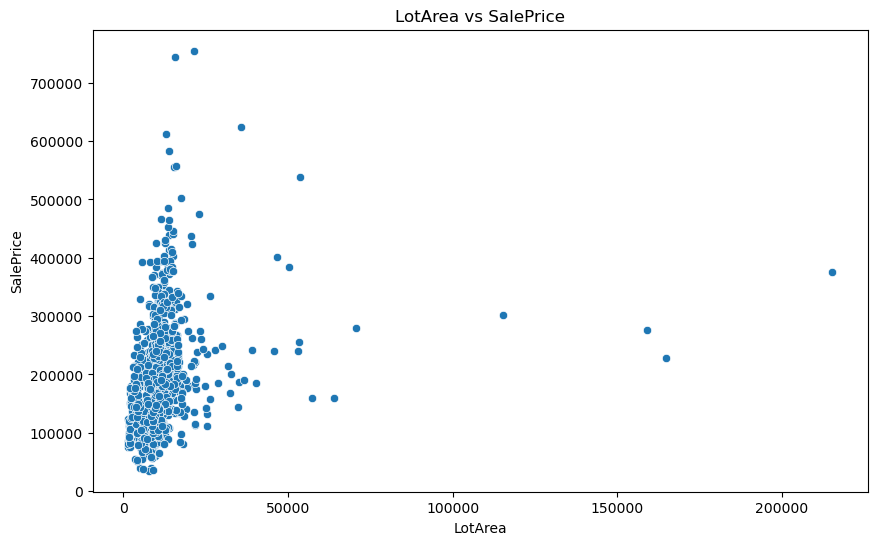

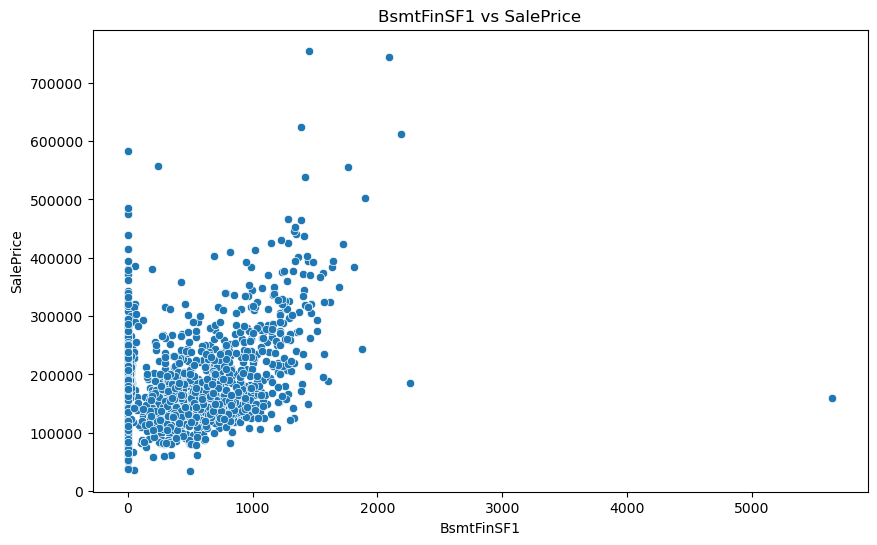

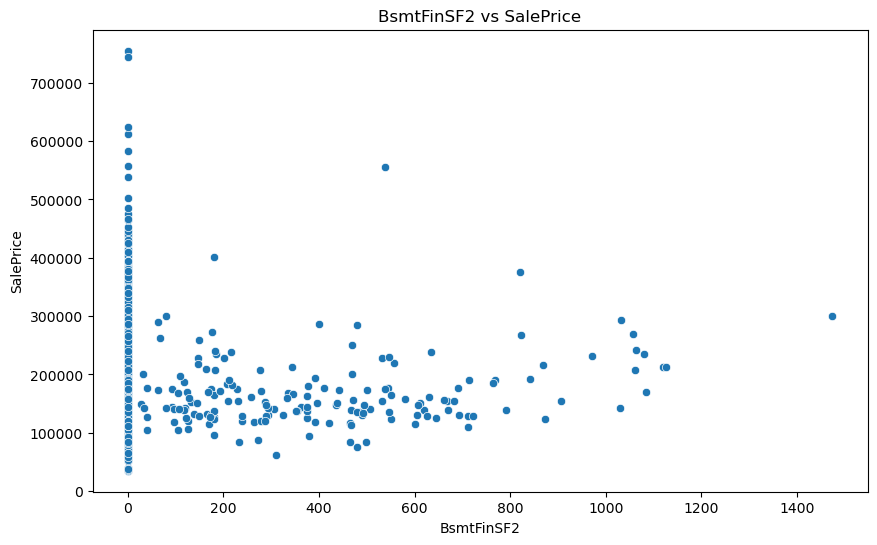

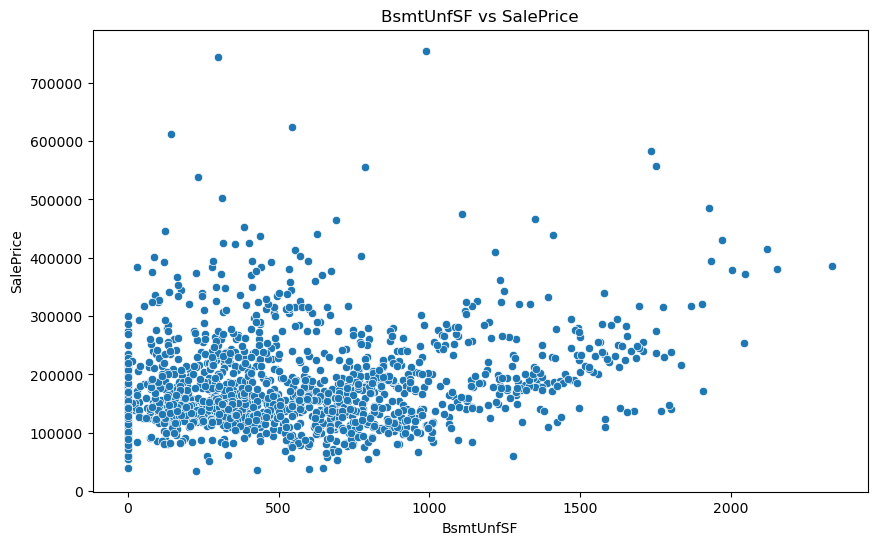

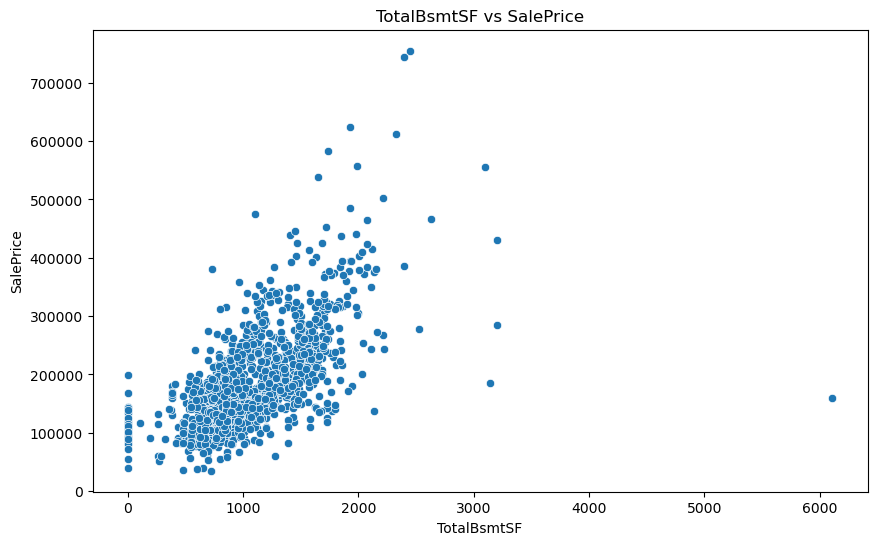

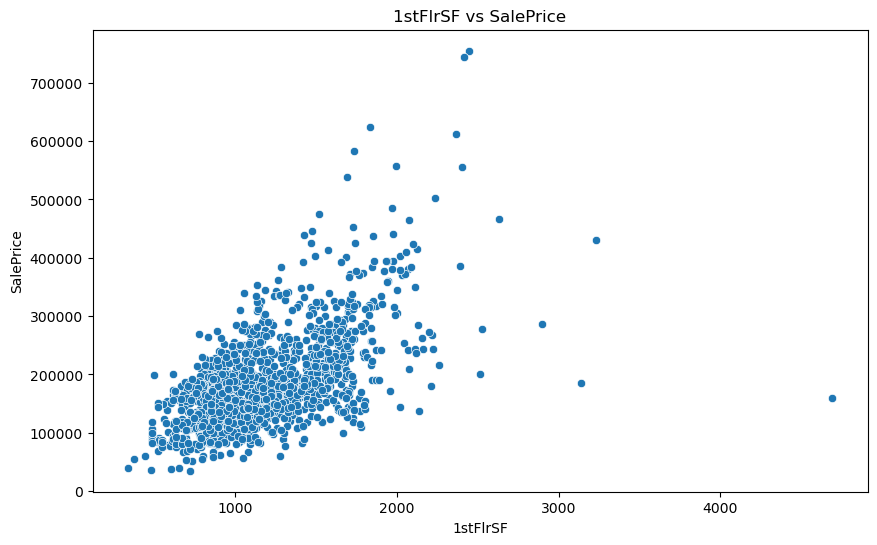

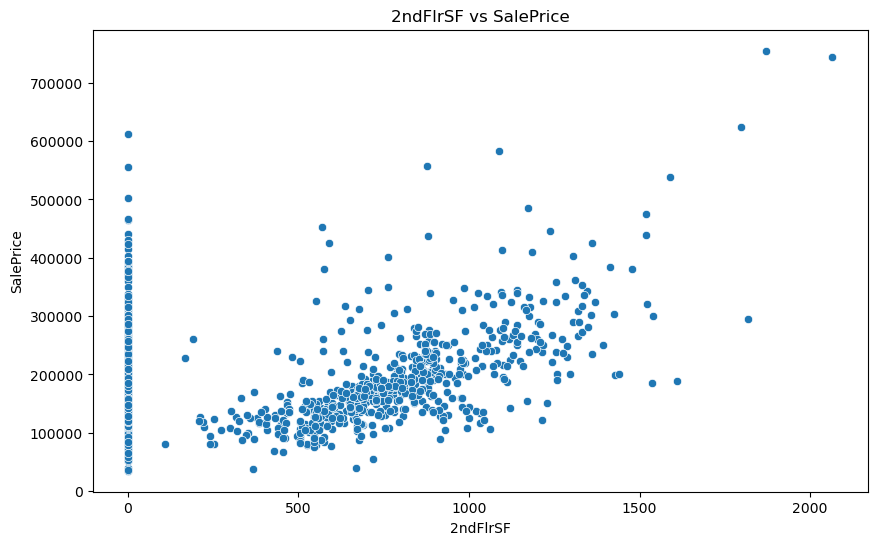

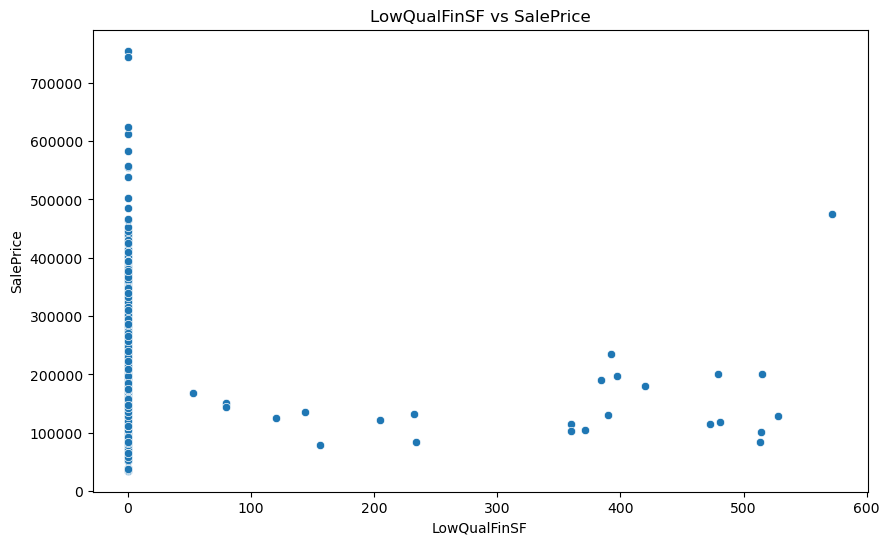

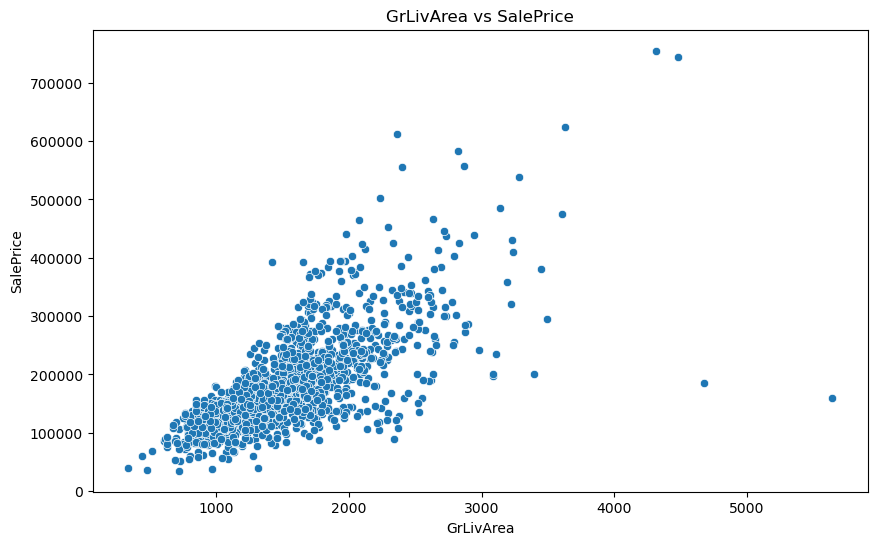

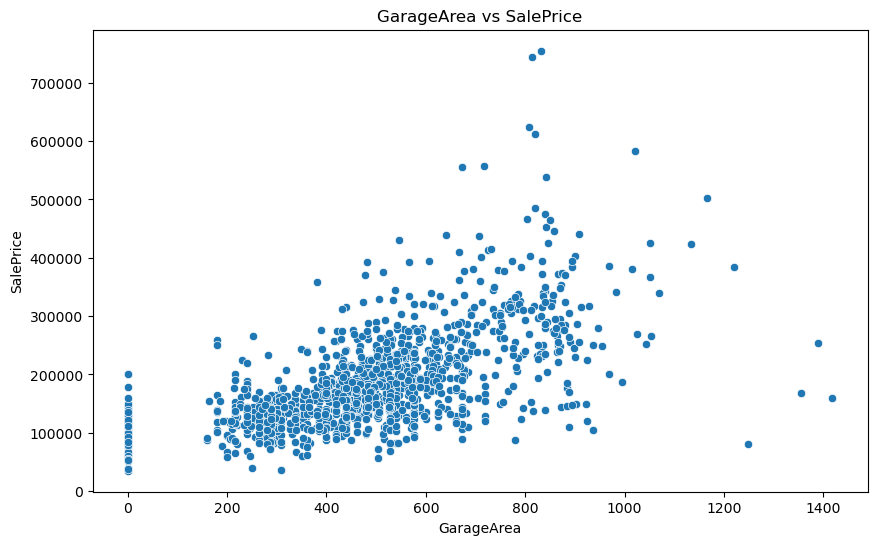

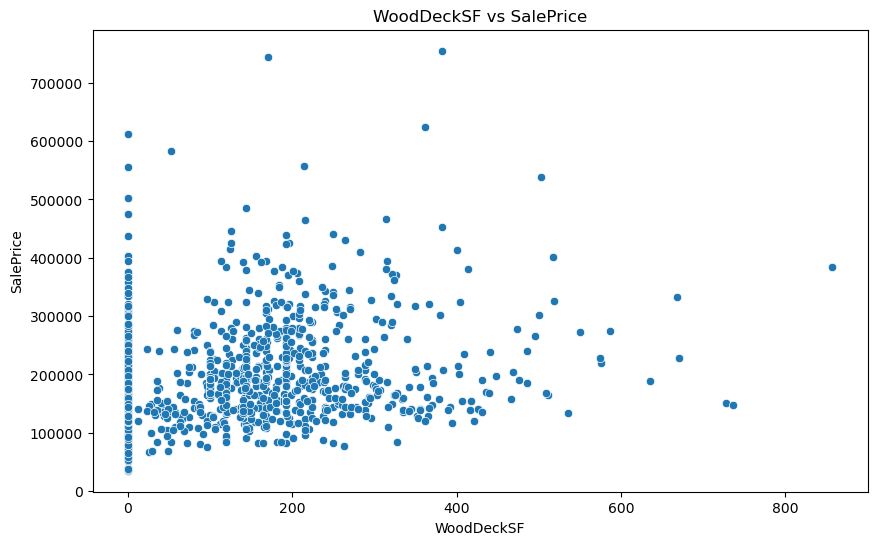

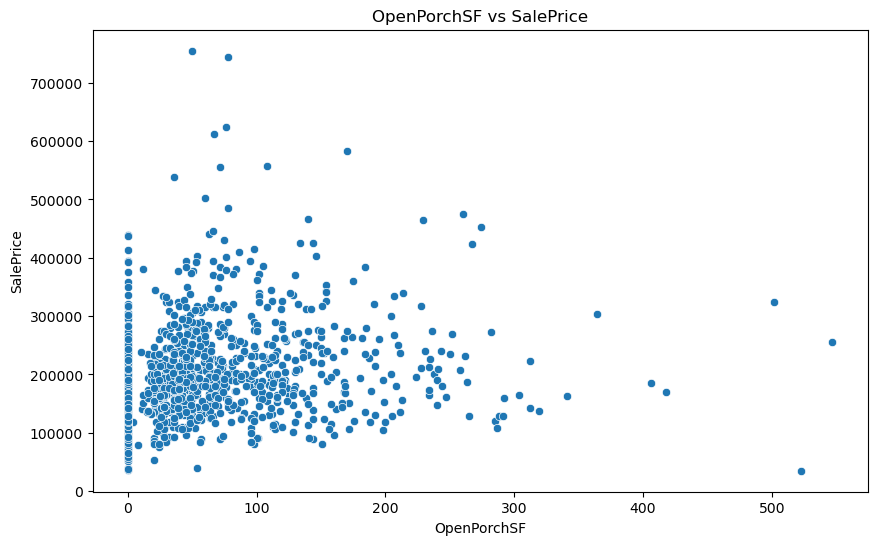

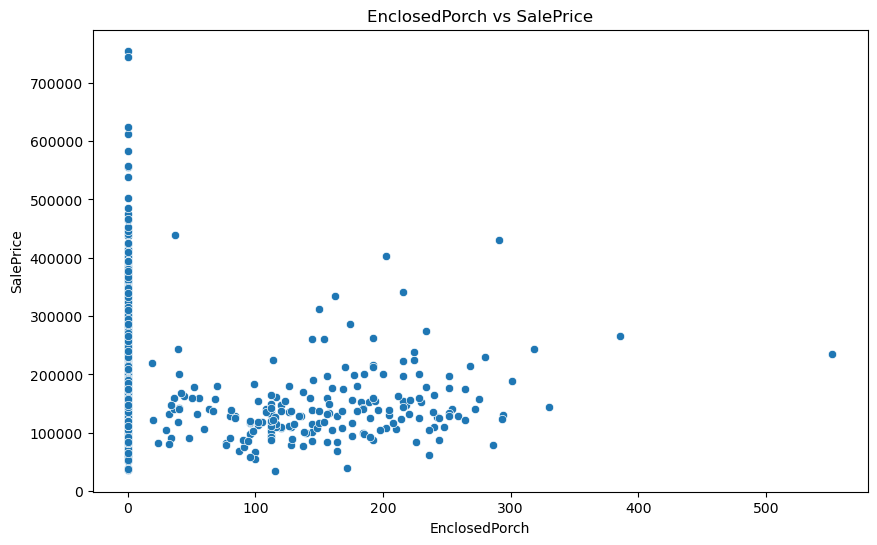

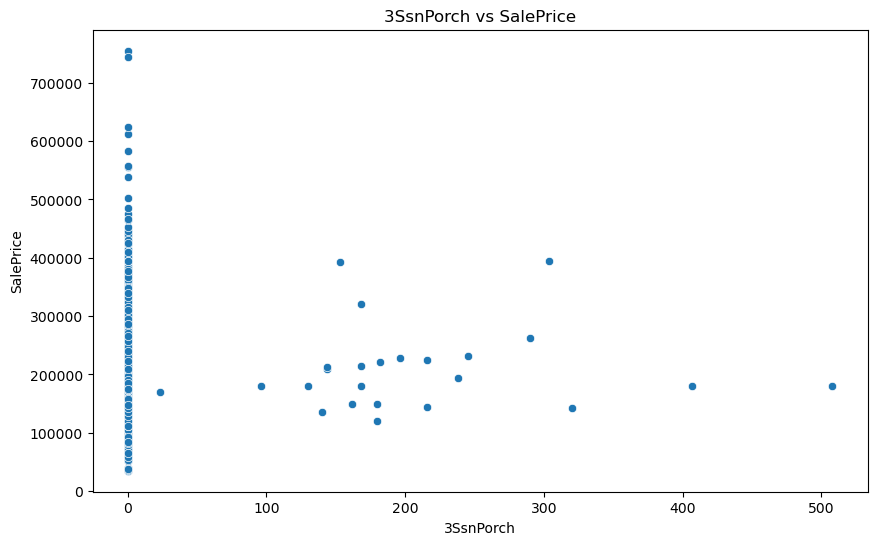

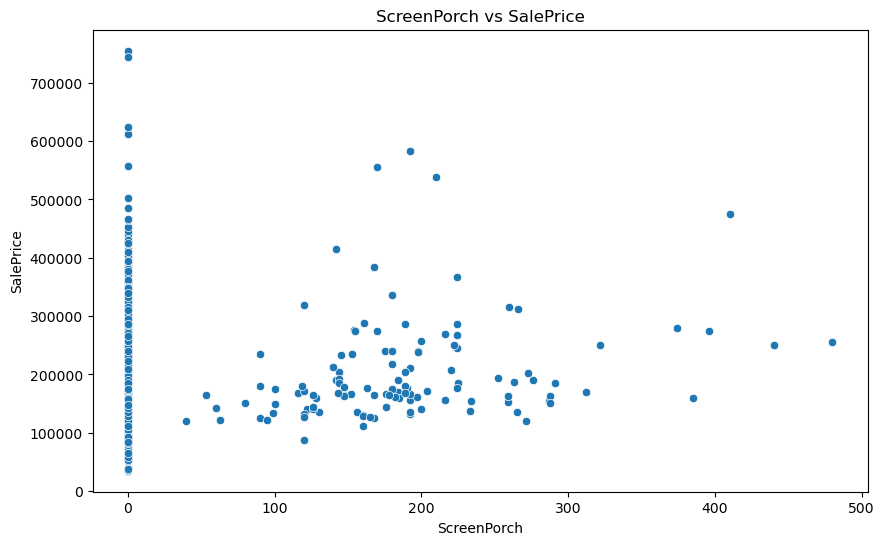

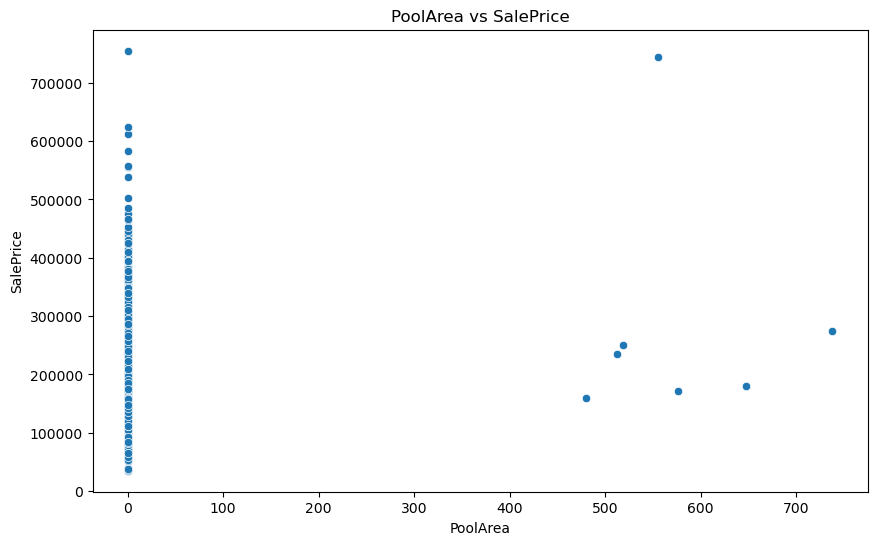

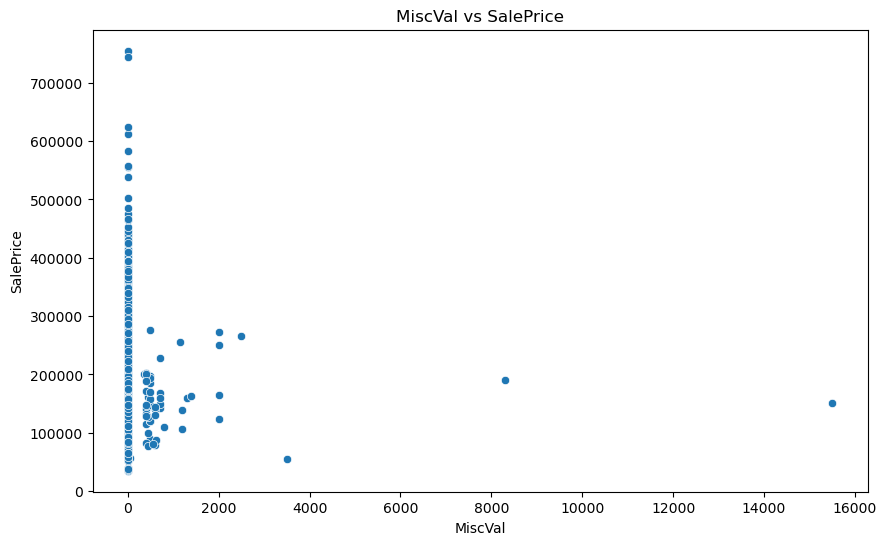

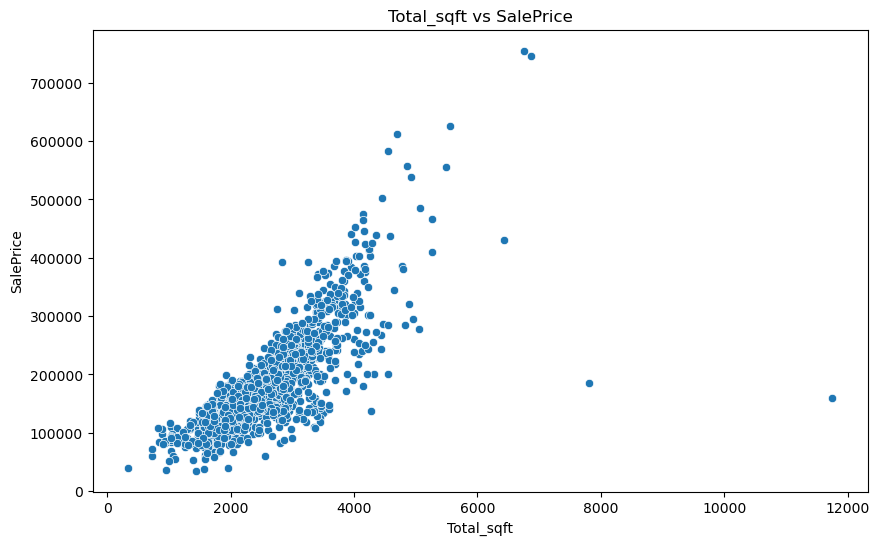

In [447]:
# Plot numerical features vs SalePrice
for feature in numerical_features:
    if feature != 'SalePrice':
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=data[feature], y=data['SalePrice'])
        plt.title(f'{feature} vs SalePrice')
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [448]:
# Removing Outliers
data.drop(data[data['Total_sqft'] > 7000].index, inplace=True)

In [449]:
data[categorical_features].head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
1,20,RL,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
2,60,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
3,70,RL,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NA,NA,NA,WD,Abnorml
4,60,RL,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal


In [450]:
pd.set_option('display.max_columns', None)

In [451]:
from sklearn.preprocessing import LabelEncoder

In [452]:
le = LabelEncoder()

In [453]:
for feature in categorical_features:
    data[feature] = le.fit_transform(data[feature])

In [454]:
data[categorical_features].head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,9,3,1,1,3,3,0,4,0,5,2,2,0,5,7,4,1,0,12,13,1,2,4,2,2,4,4,2,6,1,0,1,4,2,6,3,1,2,5,5,2,3,4,1,8,4
1,4,3,1,1,3,3,0,2,0,24,1,2,0,2,6,7,1,0,8,8,2,3,4,1,2,4,1,0,6,1,0,1,4,3,6,5,1,2,5,5,2,3,4,1,8,4
2,9,3,1,1,0,3,0,4,0,5,2,2,0,5,7,4,1,0,12,13,1,2,4,2,2,4,2,2,6,1,0,1,4,2,6,5,1,2,5,5,2,3,4,1,8,4
3,10,3,1,1,0,3,0,0,0,6,2,2,0,5,7,4,1,0,13,15,2,3,4,0,4,1,4,0,6,1,2,1,4,2,6,2,5,3,5,5,2,3,4,1,8,0
4,9,3,1,1,0,3,0,2,0,15,2,2,0,5,8,4,1,0,12,13,1,2,4,2,2,4,0,2,6,1,0,1,4,2,6,5,1,2,5,5,2,3,4,1,8,4


In [455]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Total_sqft
0,1,9,3,65.0,8450,1,1,3,3,0,4,0,5,2,2,0,5,7,4,2003,2003,1,0,12,13,1,196.0,2,4,2,2,4,4,2,706,6,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,3,1,2003.0,2,2,548,5,5,2,0,61,0,0,0,0,3,4,1,0,2,2008,8,4,208500,2566
1,2,4,3,80.0,9600,1,1,3,3,0,2,0,24,1,2,0,2,6,7,1976,1976,1,0,8,8,2,0.0,3,4,1,2,4,1,0,978,6,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,5,1,1976.0,2,2,460,5,5,2,298,0,0,0,0,0,3,4,1,0,5,2007,8,4,181500,2524
2,3,9,3,68.0,11250,1,1,0,3,0,4,0,5,2,2,0,5,7,4,2001,2002,1,0,12,13,1,162.0,2,4,2,2,4,2,2,486,6,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,5,1,2001.0,2,2,608,5,5,2,0,42,0,0,0,0,3,4,1,0,9,2008,8,4,223500,2706
3,4,10,3,60.0,9550,1,1,0,3,0,0,0,6,2,2,0,5,7,4,1915,1970,1,0,13,15,2,0.0,3,4,0,4,1,4,0,216,6,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,3,3,642,5,5,2,0,35,272,0,0,0,3,4,1,0,2,2006,8,0,140000,2473
4,5,9,3,84.0,14260,1,1,0,3,0,2,0,15,2,2,0,5,8,4,2000,2000,1,0,12,13,1,350.0,2,4,2,2,4,0,2,655,6,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,5,1,2000.0,2,3,836,5,5,2,192,84,0,0,0,0,3,4,1,0,12,2008,8,4,250000,3343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,9,3,62.0,7917,1,1,3,3,0,4,0,8,2,2,0,5,6,4,1999,2000,1,0,12,13,2,0.0,3,4,2,2,4,4,6,0,6,0,953,953,1,0,1,4,953,694,0,1647,0,0,2,1,3,1,3,7,6,1,5,1,1999.0,2,2,460,5,5,2,0,40,0,0,0,0,3,4,1,0,8,2007,8,4,175000,2600
1456,1457,4,3,85.0,13175,1,1,3,3,0,4,0,14,2,2,0,2,6,5,1978,1988,1,0,9,10,3,119.0,3,4,1,2,4,4,0,790,5,163,589,1542,1,4,1,4,2073,0,0,2073,1,0,2,0,3,1,3,7,2,2,5,1,1978.0,3,2,500,5,5,2,349,0,0,0,0,0,3,2,1,0,2,2010,8,4,210000,3615
1457,1458,10,3,66.0,9042,1,1,3,3,0,4,0,6,2,2,0,5,7,8,1941,2006,1,0,5,5,2,0.0,0,2,4,4,1,4,2,275,6,0,877,1152,1,0,1,4,1188,1152,0,2340,0,0,2,0,4,1,2,9,6,2,2,1,1941.0,2,1,252,5,5,2,0,60,0,0,0,0,3,0,3,2500,5,2010,8,4,266500,3492
1458,1459,4,3,68.0,9717,1,1,3,3,0,4,0,12,2,2,0,2,5,5,1950,1996,3,0,8,8,2,0.0,3,4,1,4,4,2,2,49,5,1029,0,1078,1,2,1,0,1078,0,0,1078,1,0,1,0,2,1,2,5,6,0,3,1,1950.0,3,1,240,5,5,2,366,0,112,0,0,0,3,4,1,0,4,2010,8,4,142125,2156


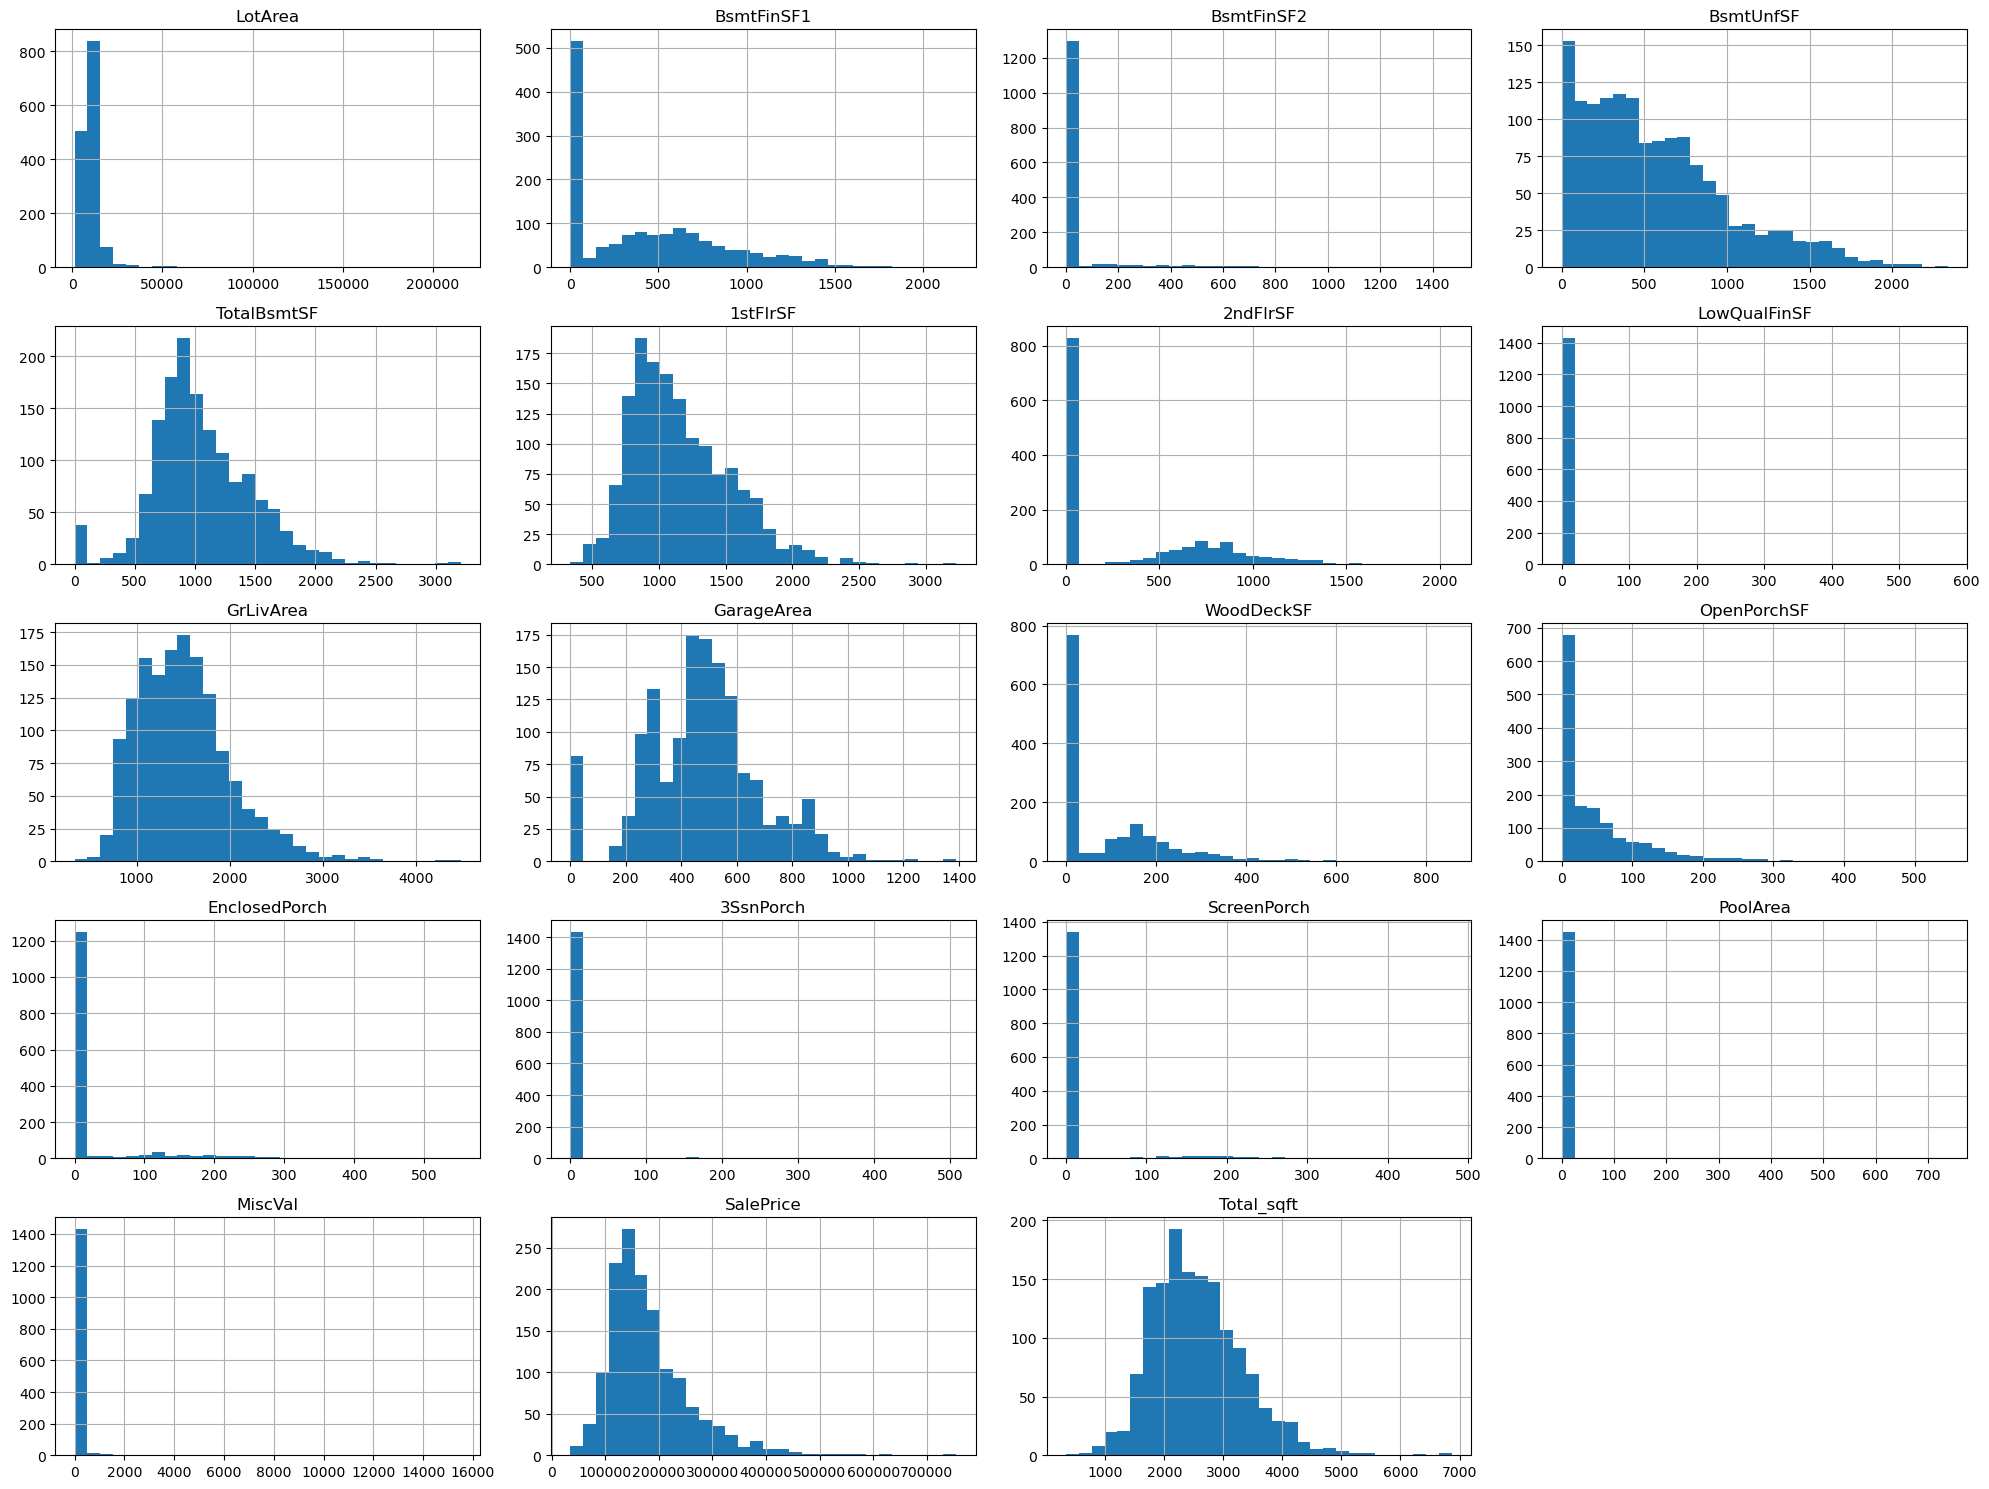

In [456]:
data[numerical_features].hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

In [457]:
# Log transform skewed numerical features
skewed_features = data[numerical_features].apply(lambda x: x.skew()).sort_values(ascending=False)
high_skew = skewed_features[skewed_features > 0.5]
skewed_features = high_skew.index

for feature in skewed_features: 
    data[feature] = np.log1p(data[feature])

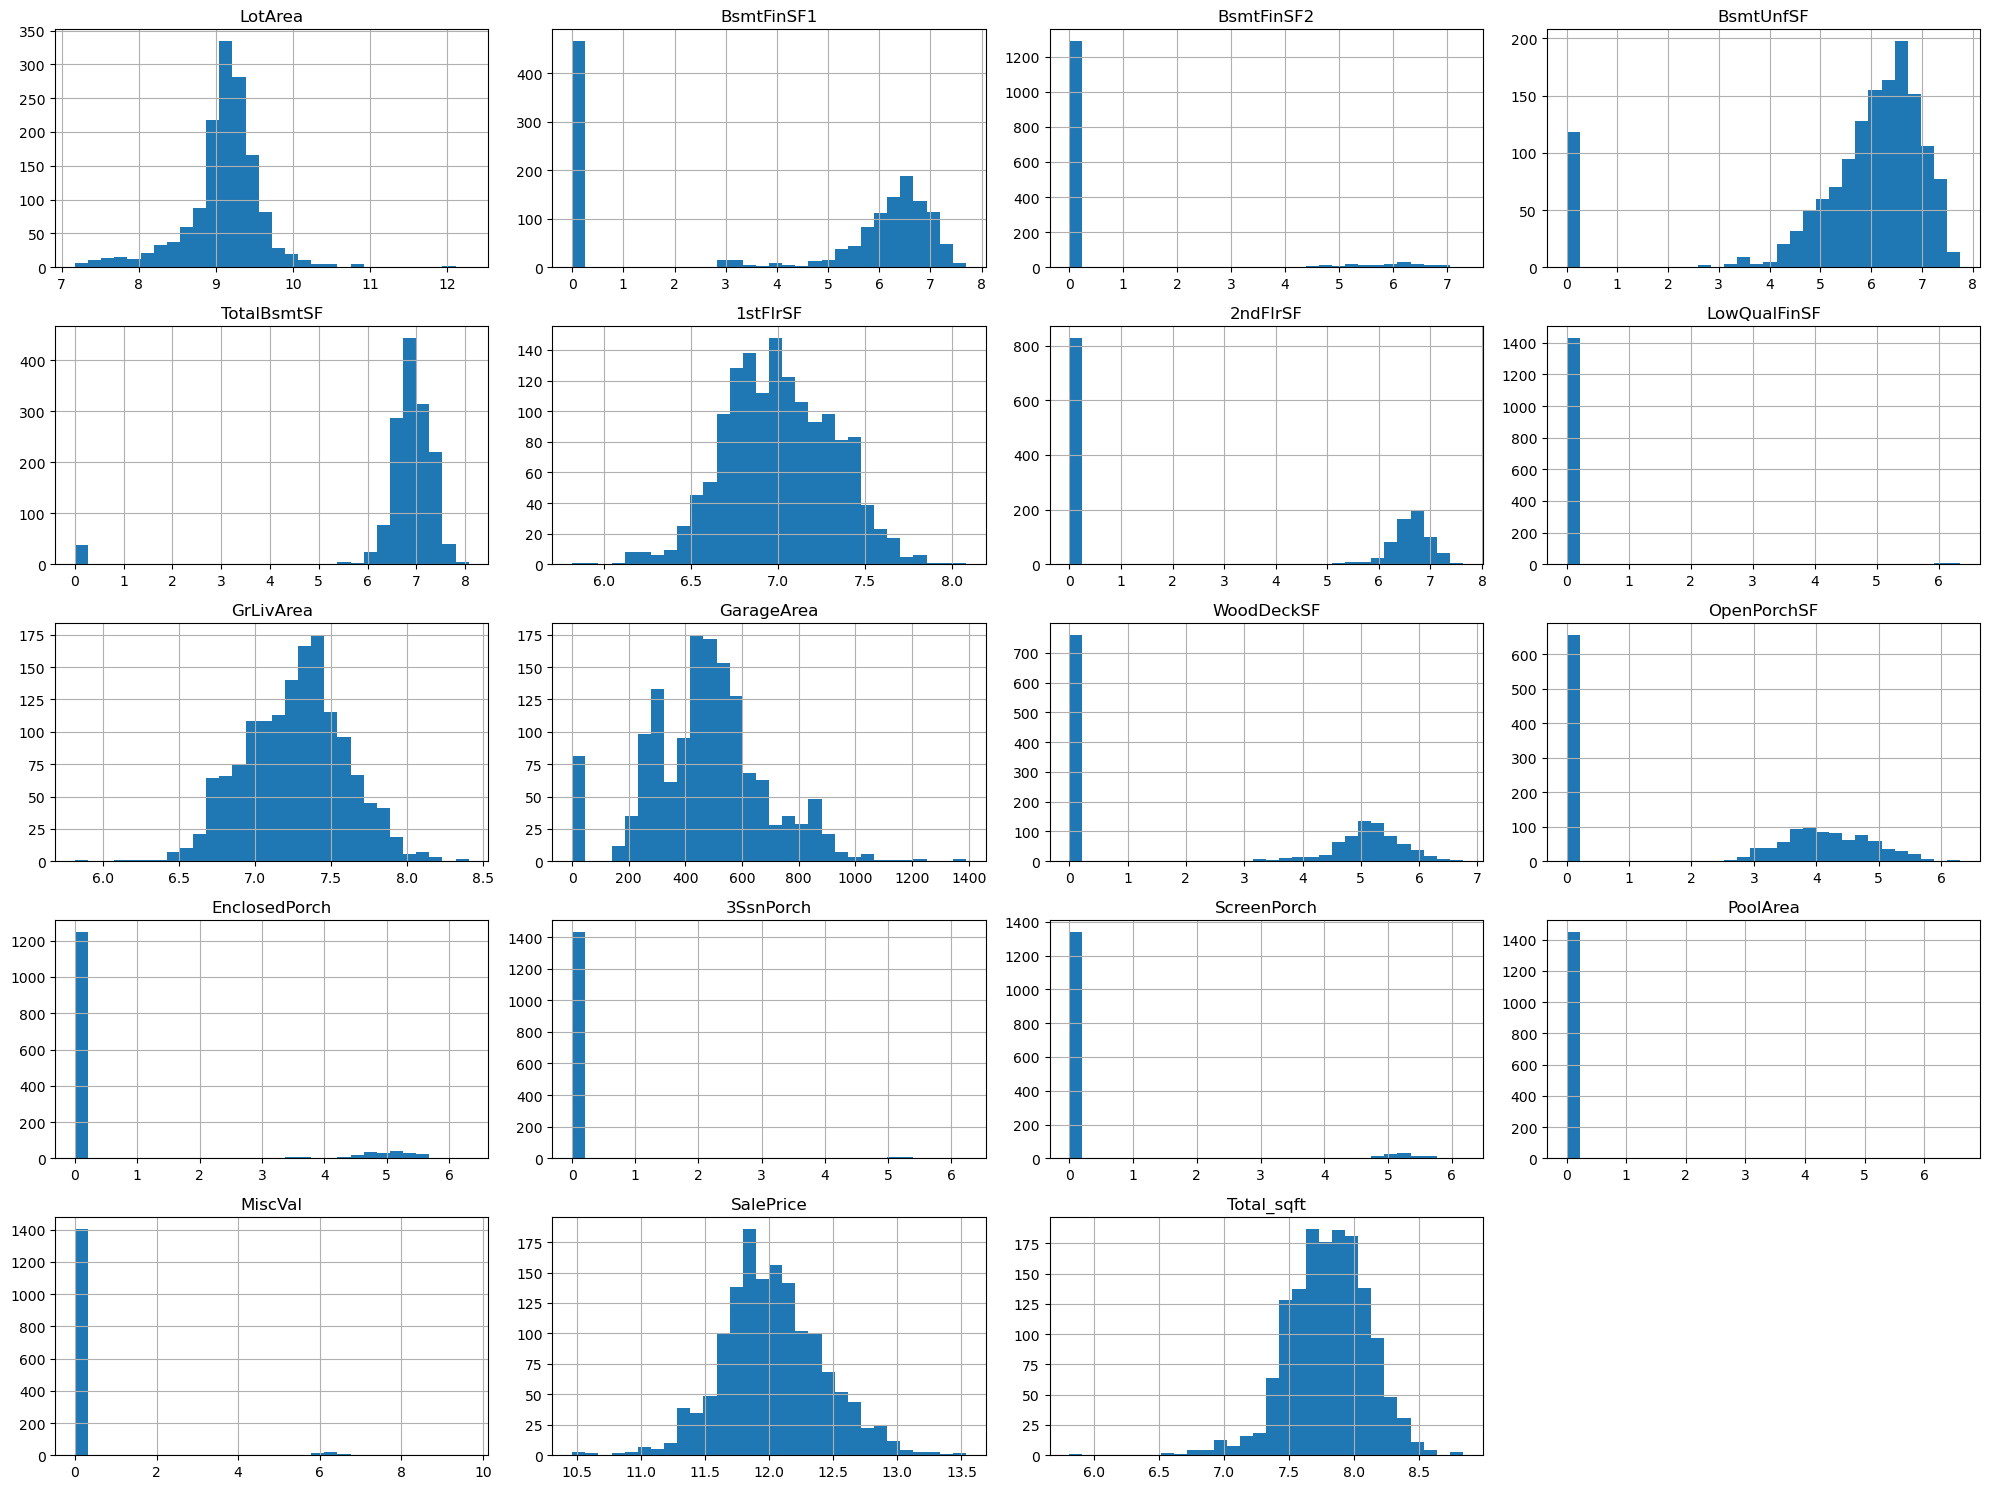

In [458]:
data[numerical_features].hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

In [459]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Total_sqft
0,1,9,3,65.0,9.042040,1,1,3,3,0,4,0,5,2,2,0,5,7,4,2003,2003,1,0,12,13,1,196.0,2,4,2,2,4,4,2,6.561031,6,0.0,5.017280,6.753438,1,0,1,4,6.753438,6.751101,0.0,7.444833,1,0,2,1,3,1,2,8,6,0,3,1,2003.0,2,2,548,5,5,2,0.000000,4.127134,0.000000,0.0,0.0,0.0,3,4,1,0.0,2,2008,8,4,12.247699,7.850493
1,2,4,3,80.0,9.169623,1,1,3,3,0,2,0,24,1,2,0,2,6,7,1976,1976,1,0,8,8,2,0.0,3,4,1,2,4,1,0,6.886532,6,0.0,5.652489,7.141245,1,0,1,4,7.141245,0.000000,0.0,7.141245,0,1,2,0,3,1,3,6,6,1,5,1,1976.0,2,2,460,5,5,2,5.700444,0.000000,0.000000,0.0,0.0,0.0,3,4,1,0.0,5,2007,8,4,12.109016,7.833996
2,3,9,3,68.0,9.328212,1,1,0,3,0,4,0,5,2,2,0,5,7,4,2001,2002,1,0,12,13,1,162.0,2,4,2,2,4,2,2,6.188264,6,0.0,6.075346,6.825460,1,0,1,4,6.825460,6.765039,0.0,7.488294,1,0,2,1,3,1,2,6,6,1,5,1,2001.0,2,2,608,5,5,2,0.000000,3.761200,0.000000,0.0,0.0,0.0,3,4,1,0.0,9,2008,8,4,12.317171,7.903596
3,4,10,3,60.0,9.164401,1,1,0,3,0,0,0,6,2,2,0,5,7,4,1915,1970,1,0,13,15,2,0.0,3,4,0,4,1,4,0,5.379897,6,0.0,6.293419,6.629363,1,2,1,4,6.869014,6.629363,0.0,7.448916,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,3,3,642,5,5,2,0.000000,3.583519,5.609472,0.0,0.0,0.0,3,4,1,0.0,2,2006,8,0,11.849405,7.813592
4,5,9,3,84.0,9.565284,1,1,0,3,0,2,0,15,2,2,0,5,8,4,2000,2000,1,0,12,13,1,350.0,2,4,2,2,4,0,2,6.486161,6,0.0,6.196444,7.044033,1,0,1,4,7.044033,6.960348,0.0,7.695758,1,0,2,1,4,1,2,9,6,1,5,1,2000.0,2,3,836,5,5,2,5.262690,4.442651,0.000000,0.0,0.0,0.0,3,4,1,0.0,12,2008,8,4,12.429220,8.114923


In [460]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1458 non-null   int64  
 1   MSSubClass     1458 non-null   int64  
 2   MSZoning       1458 non-null   int64  
 3   LotFrontage    1458 non-null   float64
 4   LotArea        1458 non-null   float64
 5   Street         1458 non-null   int64  
 6   Alley          1458 non-null   int64  
 7   LotShape       1458 non-null   int64  
 8   LandContour    1458 non-null   int64  
 9   Utilities      1458 non-null   int64  
 10  LotConfig      1458 non-null   int64  
 11  LandSlope      1458 non-null   int64  
 12  Neighborhood   1458 non-null   int64  
 13  Condition1     1458 non-null   int64  
 14  Condition2     1458 non-null   int64  
 15  BldgType       1458 non-null   int64  
 16  HouseStyle     1458 non-null   int64  
 17  OverallQual    1458 non-null   int64  
 18  OverallC

In [461]:
scaler = StandardScaler()

In [462]:
scaled_data = scaler.fit_transform(data)

In [463]:
data = pd.DataFrame(data, columns = data.columns)

In [464]:
X_test, X_train, y_test, y_train = train_test_split(data.drop('SalePrice', axis=1), data['SalePrice'], test_size=0.2, random_state=42)

In [465]:
LinearRegression_model = LinearRegression()

In [466]:
LinearRegression_model.fit(X_train, y_train)

LinearRegression()

In [467]:
LinearRegression_model.score(X_train, y_train)

0.9459169082370277

In [468]:
LinearRegression_model.score(X_test, y_test)

0.8680464636820543

In [469]:
print("R2_Square: ",r2_score(y_test, LinearRegression_model.predict(X_test)))
print("MAPE: ",mean_absolute_percentage_error(y_test, LinearRegression_model.predict(X_test)))
print("RMSE: ",mean_squared_error(y_test, LinearRegression_model.predict(X_test), squared=False))

R2_Square:  0.8680464636820543
MAPE:  0.008891850209279666
RMSE:  0.14412809717250621


In [470]:
Ridge_model = Ridge(alpha=1)

In [471]:
Ridge_model.fit(X_train, y_train)

Ridge(alpha=1)

In [472]:
print("Training Score: ",Ridge_model.score(X_train, y_train))
print("Testing Score: ",Ridge_model.score(X_test, y_test))

Training Score:  0.9450621674382411
Testing Score:  0.8704410355098666


In [473]:
print("R2_Square: ",r2_score(y_test, Ridge_model.predict(X_test)))
print("MAPE: ",mean_absolute_percentage_error(y_test, Ridge_model.predict(X_test)))
print("RMSE: ",mean_squared_error(y_test, Ridge_model.predict(X_test), squared=False))

R2_Square:  0.8704410355098666
MAPE:  0.00885124352043425
RMSE:  0.14281435744902116


In [474]:
Lasso_model = Lasso(alpha= 0.01)

In [475]:
Lasso_model.fit(X_train, y_train)
print("Training Score: ",Lasso_model.score(X_train, y_train))
print("Testing Score: ",Lasso_model.score(X_test, y_test))

Training Score:  0.8997296490994454
Testing Score:  0.8618332053816088


In [476]:
print("R2_Square: ",r2_score(y_test, Lasso_model.predict(X_test)))
print("MAPE: ",mean_absolute_percentage_error(y_test, Lasso_model.predict(X_test)))
print("RMSE: ",mean_squared_error(y_test, Lasso_model.predict(X_test), squared=False))

R2_Square:  0.8618332053816088
MAPE:  0.008615661948563579
RMSE:  0.1474823256235882


In [477]:
ElasticNet_model = ElasticNet(alpha= 0.1, l1_ratio=0.2)

In [478]:
ElasticNet_model.fit(X_train, y_train)
print("Training Score: ",ElasticNet_model.score(X_train, y_train))
print("Testing Score: ",ElasticNet_model.score(X_test, y_test))

Training Score:  0.8478259725584658
Testing Score:  0.8175782898958948


In [479]:
print("R2_Square: ",r2_score(y_test, Lasso_model.predict(X_test)))
print("MAPE: ",mean_absolute_percentage_error(y_test, Lasso_model.predict(X_test)))
print("RMSE: ",mean_squared_error(y_test, Lasso_model.predict(X_test), squared=False))

R2_Square:  0.8618332053816088
MAPE:  0.008615661948563579
RMSE:  0.1474823256235882


# Cross Validation

In [481]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for each model
param_grid = {
    'LinearRegression': {},
    'Ridge': {'alpha': [0.1, 1.0, 10.0]},
    'Lasso': {'alpha': [0.01, 0.1, 1.0]},
    'ElasticNet': {'alpha': [0.1, 1.0], 'l1_ratio': [0.2, 0.5, 0.8]}
}

# Initialize the models
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet()
}

# Perform Grid Search CV for each model
best_models = {}
for model_name in models:
    grid_search = GridSearchCV(estimator=models[model_name], param_grid=param_grid[model_name], cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {model_name}: {grid_search.best_score_}")

Best parameters for LinearRegression: {}
Best cross-validation score for LinearRegression: 0.8469890147310695
Best parameters for Ridge: {'alpha': 1.0}
Best cross-validation score for Ridge: 0.8675427263243781
Best parameters for Lasso: {'alpha': 0.01}
Best cross-validation score for Lasso: 0.8462237490643009
Best parameters for ElasticNet: {'alpha': 0.1, 'l1_ratio': 0.2}
Best cross-validation score for ElasticNet: 0.8011526824259748


In [ ]:


# Function to calculate and print metrics with 4 decimal places
def print_metrics(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f"Training R2 Score: {r2_score(y_train, y_train_pred):.4f}")
    print(f"Testing R2 Score: {r2_score(y_test, y_test_pred):.4f}")
    print(f"Training MAPE: {mean_absolute_percentage_error(y_train, y_train_pred):.4f}")
    print(f"Testing MAPE: {mean_absolute_percentage_error(y_test, y_test_pred):.4f}")
    print(f"Training RMSE: {mean_squared_error(y_train, y_train_pred, squared=False):.4f}")
    print(f"Testing RMSE: {mean_squared_error(y_test, y_test_pred, squared=False):.4f}")

# Print metrics for each best model
for model_name, model in best_models.items():
    print(f"Metrics for {model_name}:")
    print_metrics(model, X_train, y_train, X_test, y_test)
    print("\n")


Metrics for LinearRegression:
Training R2 Score: 0.9459
Testing R2 Score: 0.8680
Training MAPE: 0.0060
Testing MAPE: 0.0089
Training RMSE: 0.0955
Testing RMSE: 0.1441


Metrics for Ridge:
Training R2 Score: 0.9451
Testing R2 Score: 0.8704
Training MAPE: 0.0060
Testing MAPE: 0.0089
Training RMSE: 0.0962
Testing RMSE: 0.1428


Metrics for Lasso:
Training R2 Score: 0.8997
Testing R2 Score: 0.8618
Training MAPE: 0.0078
Testing MAPE: 0.0086
Training RMSE: 0.1300
Testing RMSE: 0.1475


Metrics for ElasticNet:
Training R2 Score: 0.8478
Testing R2 Score: 0.8176
Training MAPE: 0.0096
Testing MAPE: 0.0098
Training RMSE: 0.1602
Testing RMSE: 0.1695


